# Squid Game Netflix Twitter Data

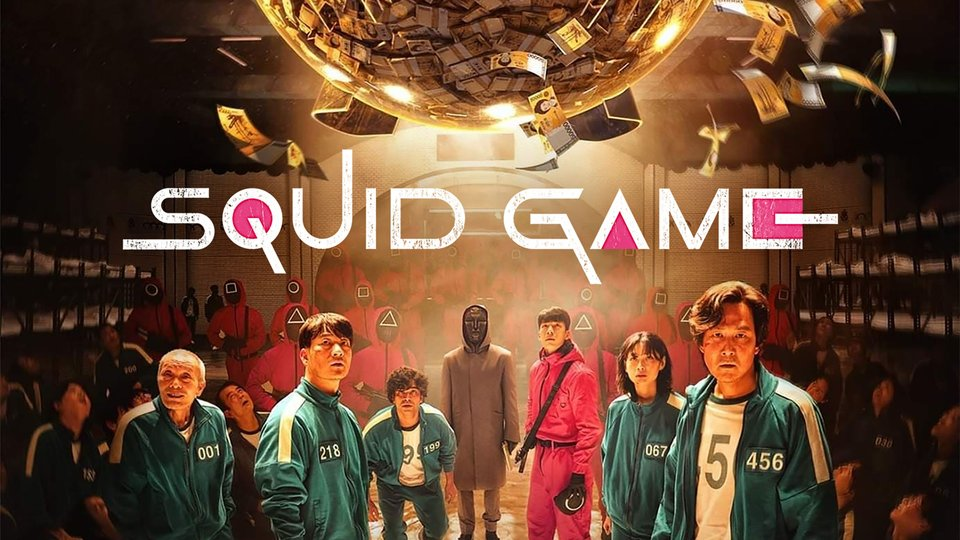!

# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import unidecode
from tqdm import tqdm
from symspellpy.symspellpy import SymSpell, Verbosity
import pkg_resources
import re, string, json

import warnings
warnings.filterwarnings("ignore")

# 1. Data Loading

In [2]:
import numpy as np
import pandas as pd

url = 'https://drive.google.com/file/d/1B7OfguKeXhjjH1VHJgN49EGwLwj44Q5C/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head()

user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   

   user_verified                       date  \
0          False  2021-10-06 12:05:38+00:00   
1          False  2021-10-06 12:05:22+00:00   
2          False  2021-10-06 12:05:22+00:00   
3          False  2021-10-06 12:05:04+00:00   
4          False  2021-10-06 12:05:00+00:00   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1  That marble episode of #SquidGame  ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on 1st slide\nI'm joining the squidgam...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   

   is_retweet  
0       False  
1       False  
2       False  
3       False  
4       False

# 2. Data Preprocessing

In [3]:
df.shape

(80019, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [5]:
# Check missing values
df.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [6]:
# Converting column data type
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

user_name  user_location  \
0   the _ûndër-ratèd niggáh👊🏾            NaN   
1  Best uncle on planet earth            NaN   
2                      marcie            NaN   
3                    YoMo.Mdp  Any pronouns    
4             Laura Reactions         France   

                                    user_description  \
0  @ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...   
1                                                NaN   
2  animal crossing. chicken nuggets. baby yoda. s...   
3  Where the heck is the karma\nI'm going on my s...   
4  I talk and I make reactions videos about shows...   

                user_created  user_followers  user_friends  user_favourites  \
0  2019-09-06 19:24:57+00:00             581          1035             8922   
1  2013-05-08 19:35:26+00:00             741           730             8432   
2  2009-02-21 10:31:30+00:00             562          1197            62732   
3  2021-02-14 13:21:22+00:00               3           277             1341   
4  2018-12-19 20:38:28+00:00             330           152             2278   

   user_verified        date  \
0          False  2021-10-06   
1          False  2021-10-06   
2          False  2021-10-06   
3          False  2021-10-06   
4          False  2021-10-06   

                                                text               source  \
0  When life hits and the same time poverty strik...  Twitter for Android   
1  That marble episode of #SquidGame  ruined me. 😭😭😭  Twitter for Android   
2                                    #Squidgame time      Twitter Web App   
3  //Blood on 1st slide\nI'm joining the squidgam...      Twitter Web App   
4  The two first games, players were killed by th...      Twitter Web App   

   is_retweet  
0       False  
1       False  
2       False  
3       False  
4       False

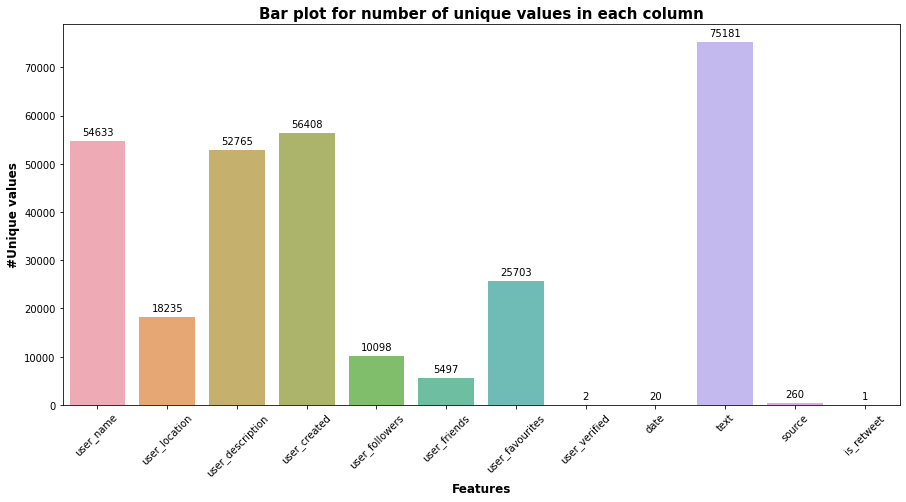

In [7]:
# Check unique values on each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]

for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
    
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=45)
plt.show()

Nearly 68% and 70% of the user name,and user description are unique

## Top 10 users

In [8]:
sns.set_palette("Set2")

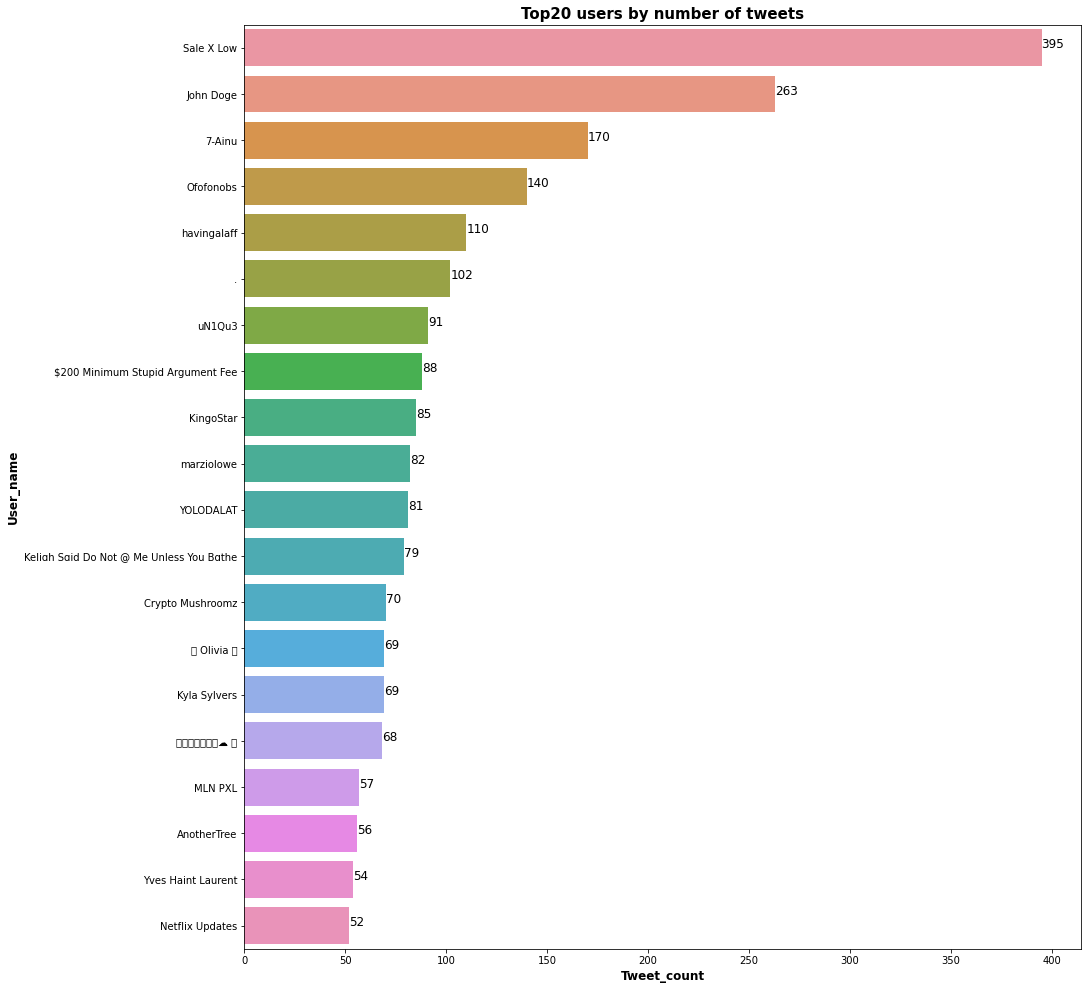

In [9]:
top_n = 20

df_data_username_count = df['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

# Create plot
plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='tweet_count', data=df_data_username_count.head(top_n))
y=df_data_username_count['tweet_count'].head(top_n)

# Display label values
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)

plt.title(f'Top{top_n} users by number of tweets',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Tweet_count', size=12, weight='bold')
plt.show()

## Tweet Count by location

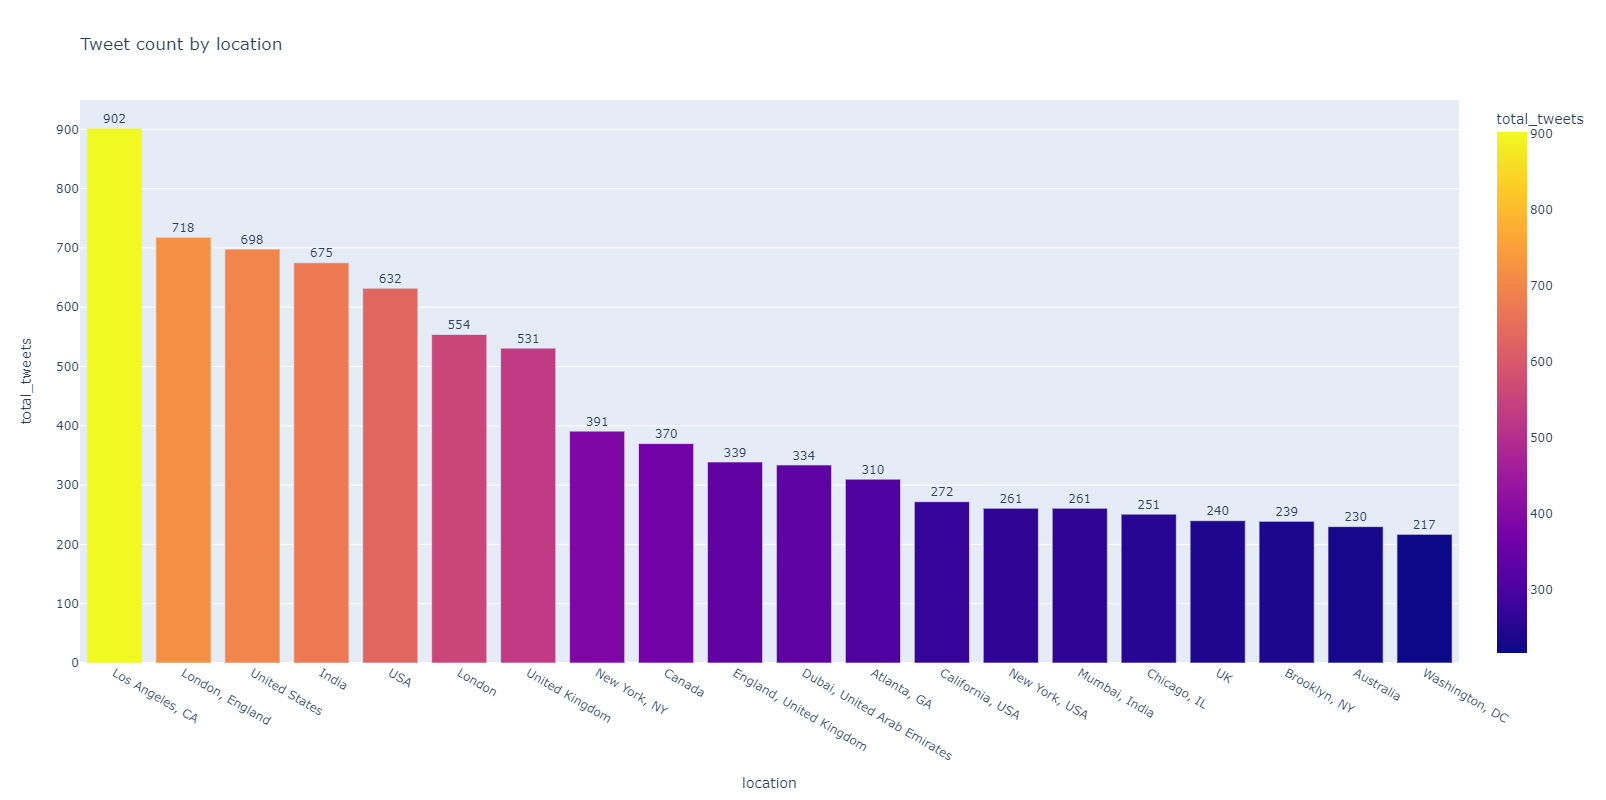

In [10]:
import plotly.express as px
sns.set_palette('coolwarm')


df_tweet_count = df['user_location'].value_counts().nlargest(20).reset_index().rename(columns={'user_location':'total_tweets','index':'location'})

fig = px.bar(df_tweet_count, x='location', y='total_tweets', 
             height=800, 
             width=1400, 
             title='Tweet count by location', 
             color='total_tweets',
             text='total_tweets')

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

## Tweets by source

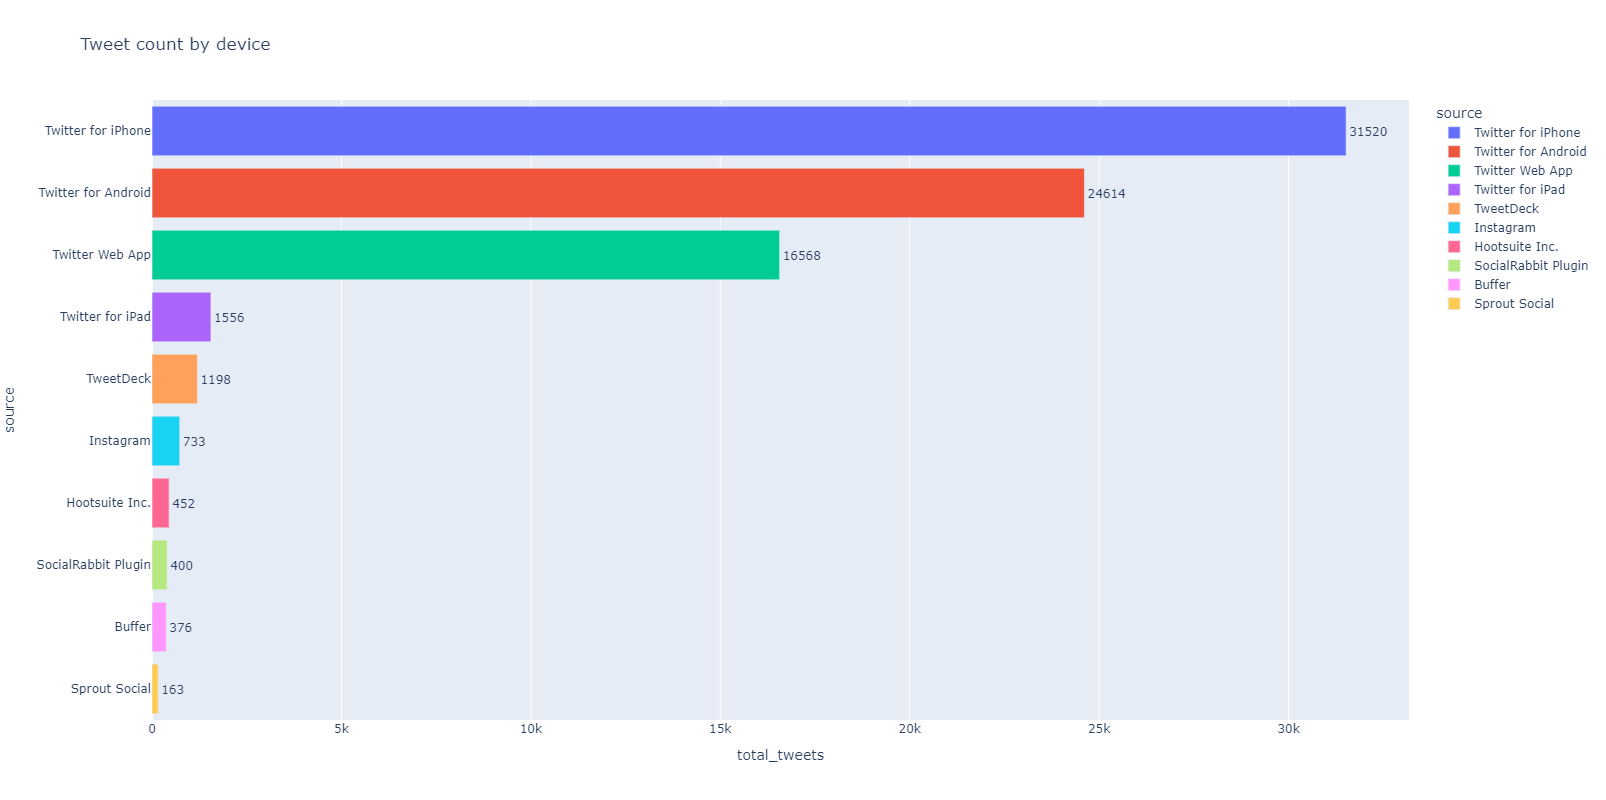

In [11]:
df_source_count = df['source'].value_counts().nlargest(10).reset_index().rename(columns={'source':'total_tweets','index':'source'})

fig = px.bar(df_source_count, x='total_tweets', y='source', 
             height=800, 
             width=1400, 
             title='Tweet count by device', 
             color='source', text='total_tweets')

fig.update_traces(textfont_size=12, textposition="outside", cliponaxis=False)

fig.show()

## Twitter by date

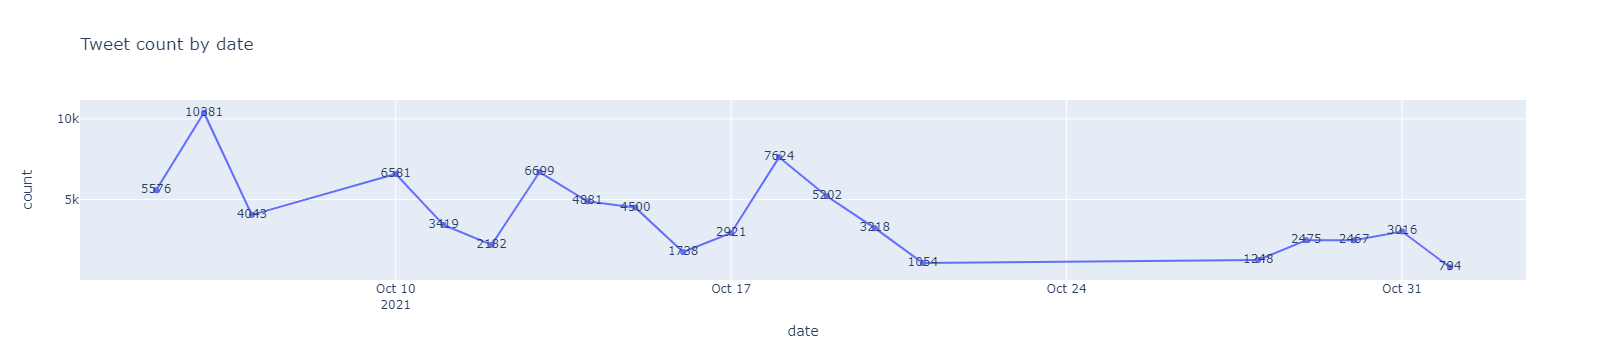

In [12]:
#df_source_count = df['source'].value_counts().nlargest(10).reset_index().rename(columns={'source':'total_tweets','index':'source'})

df['tweet_date']= pd.to_datetime(df['date'],errors='coerce').dt.date
df_tweet_count = df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
df_tweet_count['date']=pd.to_datetime(df_tweet_count['date'])
df_tweet_count= df_tweet_count.sort_values('date',ascending=False)

fig = px.line(df_tweet_count, x='date', y='count', 
             title='Tweet count by date', 
             text='count')

fig.show()

# Visualize word cloud

In [13]:
#!pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stopwords= set(stopwords.words('english'))

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

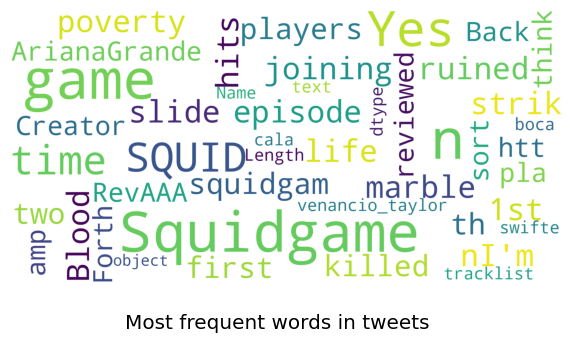

In [15]:
show_wordcloud(df['text'], title = 'Most frequent words in tweets')

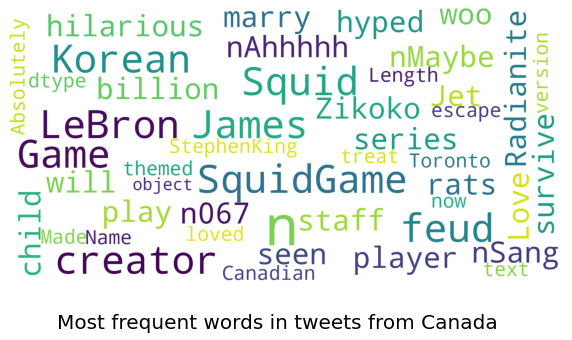

In [16]:
canada_df = df.loc[df.user_location=="Canada"]
show_wordcloud(canada_df['text'], title = 'Most frequent words in tweets from Canada')

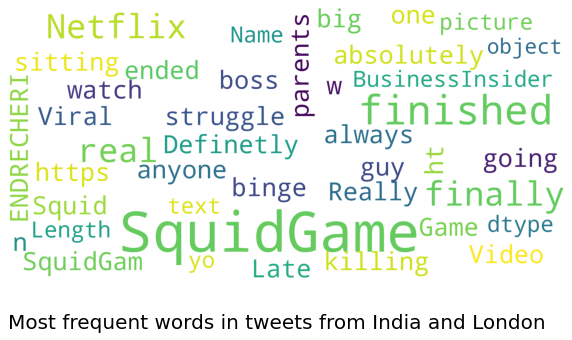

In [17]:
locations = ['India','London']
other_location_df = df[df['user_location'].isin(locations)]

show_wordcloud(other_location_df['text'], title = 'Most frequent words in tweets from India and London')

# 3. Data Modeling

In [18]:
# 2.1 text preprocesing for Sentiment Analysis 

In [19]:
# Get a sample of 15k of tweets
df = df.sample(15000)

In [20]:
df.shape

(15000, 13)

In [21]:
df.head()

user_name          user_location  \
40671                            Jess  36.179129,-115.058818   
43057                       Papa Tony                  Miami   
15874                       Evil Mark          Colorado, USA   
20587  ellie 🌸🔞 | blogger & bad b*tch      San Francisco, CA   
23090                   Cornflakebabe                    NaN   

                                        user_description  \
40671  Likes a bit of everything. Mainly talking abou...   
43057                                                NaN   
15874  #Juggalo #Weirdo #ClownLivesMatter #ChiefsKingdom   
20587  🎨 pfp by @steakersstudio\n🔮 casting curses & c...   
23090                 i love my dog chip & i like apples   

                    user_created  user_followers  user_friends  \
40671  2007-08-01 03:24:27+00:00             541           627   
43057  2010-09-17 18:22:56+00:00              92           318   
15874  2020-09-09 20:24:56+00:00             295           781   
20587  2013-11-26 20:14:45+00:00             727          1812   
23090  2020-12-13 17:03:46+00:00              27             8   

       user_favourites  user_verified        date  \
40671             1237          False  2021-10-16   
43057             2270          False  2021-10-15   
15874             1093          False  2021-10-06   
20587           293507          False  2021-10-11   
23090              685          False  2021-10-11   

                                                    text               source  \
40671  After work I binged watch the entire show of #...   Twitter for iPhone   
43057  Three episodes in.  Very good so far.  I would...            Instagram   
15874                 Ok @Netflix. I’ll bite. #SquidGame   Twitter for iPhone   
20587  #SquidGame this man really gonna bring out his...  Twitter for Android   
23090  Squid Game is phenomenal and anyone calling it...   Twitter for iPhone   

       is_retweet  tweet_date  
40671       False  2021-10-16  
43057       False  2021-10-15  
15874       False  2021-10-06  
20587       False  2021-10-11  
23090       False  2021-10-11

## 3.1 Text preprocessing functions

In [22]:
def regexptokenizer(data):
    data['text'] =  data['text'].map(lambda x:BeautifulSoup(x, 'lxml').get_text())
    #remove words which are starts with @ symbols
    data['text'] = data['text'].map(lambda x:re.sub('@\w*','',str(x)))
    #remove link starts with https
    #simplify_punctuation  
    data['text'] = data['text'].map(lambda x:re.sub(r'([!?,;])\1+', r'\1', str(x)))
    data['text'] = data['text'].map(lambda x:re.sub(r'\.{2,}', r'...', str(x)))
    data['text'] = data['text'].map(lambda x:re.sub('http.*','',str(x)))
    #removing data and time (numeric values)
    data['text'] = data['text'].map(lambda x:re.sub('[0-9]','',str(x)))
    #removing special characters
    data['text'] = data['text'].map(lambda x:re.sub('[#|*|$|:|\\|&|]','',str(x)))
    #normalizing whitespace
    data['text'] = data['text'].map(lambda x:re.sub(r"//t",r"\t", str(x)))
    data['text'] = data['text'].map(lambda x:re.sub(r"( )\1+",r"\1", str(x)))
    data['text'] = data['text'].map(lambda x:re.sub(r"(\n)\1+",r"\1", str(x)))
    data['text'] = data['text'].map(lambda x:re.sub(r"(\r)\1+",r"\1", str(x)))
    data['text'] = data['text'].map(lambda x:re.sub(r"(\t)\1+",r"\1", str(x)))
    data['text'] = data['text'].map(lambda x:unidecode.unidecode(str(x)))

In [23]:
def normalize_contractions(sentence_list):
    contraction_list = json.loads(open('english_contractions.json', 'r').read())
    norm_sents = []
    print("Normalizing contractions")
    for sentence in tqdm(sentence_list):
        norm_sents.append(_normalize_contractions_text(sentence, contraction_list))
    return norm_sents

In [24]:
def _normalize_contractions_text(text, contractions):
    """
    This function normalizes english contractions.
    """
    new_token_list = []
    token_list = text.split()
    for word_pos in range(len(token_list)):
        word = token_list[word_pos]
        first_upper = False
        if word[0].isupper():
            first_upper = True
        if word.lower() in contractions:
            replacement = contractions[word.lower()]
            if first_upper:
                replacement = replacement[0].upper()+replacement[1:]
            replacement_tokens = replacement.split()
            if len(replacement_tokens)>1:
                new_token_list.append(replacement_tokens[0])
                new_token_list.append(replacement_tokens[1])
            else:
                new_token_list.append(replacement_tokens[0])
        else:
            new_token_list.append(word)
    sentence = " ".join(new_token_list).strip(" ")
    return sentence


In [25]:
def spell_correction(sentence_list):
    max_edit_distance_dictionary= 3
    prefix_length = 4
    spellchecker = SymSpell(max_edit_distance_dictionary, prefix_length)
    dictionary_path = pkg_resources.resource_filename(
        "symspellpy", "frequency_dictionary_en_82_765.txt")
    bigram_path = pkg_resources.resource_filename(
        "symspellpy", "frequency_bigramdictionary_en_243_342.txt")
    spellchecker.load_dictionary(dictionary_path, term_index=0, count_index=1)
    spellchecker.load_bigram_dictionary(dictionary_path, term_index=0, count_index=2)
    norm_sents = []
    print("Spell correcting")
    for sentence in tqdm(sentence_list):
        norm_sents.append(_spell_correction_text(sentence, spellchecker))
    return norm_sents

In [26]:
def _spell_correction_text(text, spellchecker):
    """
    This function does very simple spell correction normalization using pyspellchecker module. 
    It works over a tokenized sentence and only the token representations are changed.
    """
    if len(text) < 1:
        return ""
    #Spell checker config
    max_edit_distance_lookup = 2
    suggestion_verbosity = Verbosity.TOP # TOP, CLOSEST, ALL
    #End of Spell checker config
    token_list = text.split()
    for word_pos in range(len(token_list)):
        word = token_list[word_pos]
        if word is None:
            token_list[word_pos] = ""
            continue
        if not '\n' in word and word not in string.punctuation and not is_numeric(word) and not (word.lower() in spellchecker.words.keys()):
            suggestions = spellchecker.lookup(word.lower(), suggestion_verbosity, max_edit_distance_lookup)
            #Checks first uppercase to conserve the case.
            upperfirst = word[0].isupper()
            #Checks for correction suggestions.
            if len(suggestions) > 0:
                correction = suggestions[0].term
                replacement = correction
            #We call our _reduce_exaggerations function if no suggestion is found. Maybe there are repeated chars.
            else:
                replacement = _reduce_exaggerations(word)
            #Takes the case back to the word.
            if upperfirst:
                replacement = replacement[0].upper()+replacement[1:]
            word = replacement
            token_list[word_pos] = word
    return " ".join(token_list).strip()

In [27]:
def is_numeric(text):
    for char in text:
        if not (char in "0123456789" or char in ",%.$"):
            return False
    return True

In [28]:
def _reduce_exaggerations(text):
    """
    Auxiliary function to help with exxagerated words.
    Examples:
        woooooords -> words
        yaaaaaaaaaaaaaaay -> yay
    """
    correction = str(text)
    #TODO work on complexity reduction.
    return re.sub(r'([\w])\1+', r'\1', correction)

In [29]:
# Remove punctuation and special characters
regexptokenizer(df)

In [30]:
df.head()

user_name          user_location  \
40671                            Jess  36.179129,-115.058818   
43057                       Papa Tony                  Miami   
15874                       Evil Mark          Colorado, USA   
20587  ellie 🌸🔞 | blogger & bad b*tch      San Francisco, CA   
23090                   Cornflakebabe                    NaN   

                                        user_description  \
40671  Likes a bit of everything. Mainly talking abou...   
43057                                                NaN   
15874  #Juggalo #Weirdo #ClownLivesMatter #ChiefsKingdom   
20587  🎨 pfp by @steakersstudio\n🔮 casting curses & c...   
23090                 i love my dog chip & i like apples   

                    user_created  user_followers  user_friends  \
40671  2007-08-01 03:24:27+00:00             541           627   
43057  2010-09-17 18:22:56+00:00              92           318   
15874  2020-09-09 20:24:56+00:00             295           781   
20587  2013-11-26 20:14:45+00:00             727          1812   
23090  2020-12-13 17:03:46+00:00              27             8   

       user_favourites  user_verified        date  \
40671             1237          False  2021-10-16   
43057             2270          False  2021-10-15   
15874             1093          False  2021-10-06   
20587           293507          False  2021-10-11   
23090              685          False  2021-10-11   

                                                    text               source  \
40671  After work I binged watch the entire show of S...   Twitter for iPhone   
43057  Three episodes in. Very good so far. I would h...            Instagram   
15874                          Ok . I'll bite. SquidGame   Twitter for iPhone   
20587  SquidGame this man really gonna bring out his ...  Twitter for Android   
23090  Squid Game is phenomenal and anyone calling it...   Twitter for iPhone   

       is_retweet  tweet_date  
40671       False  2021-10-16  
43057       False  2021-10-15  
15874       False  2021-10-06  
20587       False  2021-10-11  
23090       False  2021-10-11

In [31]:
df['text'] = normalize_contractions(df['text'])
df['text'] = spell_correction(df['text'])

Normalizing contractions


100%|██████████████████████████████████| 15000/15000 [00:00<00:00, 181208.66it/s]


Spell correcting


100%|█████████████████████████████████████| 15000/15000 [01:50<00:00, 135.62it/s]


In [32]:
df.head()

user_name          user_location  \
40671                            Jess  36.179129,-115.058818   
43057                       Papa Tony                  Miami   
15874                       Evil Mark          Colorado, USA   
20587  ellie 🌸🔞 | blogger & bad b*tch      San Francisco, CA   
23090                   Cornflakebabe                    NaN   

                                        user_description  \
40671  Likes a bit of everything. Mainly talking abou...   
43057                                                NaN   
15874  #Juggalo #Weirdo #ClownLivesMatter #ChiefsKingdom   
20587  🎨 pfp by @steakersstudio\n🔮 casting curses & c...   
23090                 i love my dog chip & i like apples   

                    user_created  user_followers  user_friends  \
40671  2007-08-01 03:24:27+00:00             541           627   
43057  2010-09-17 18:22:56+00:00              92           318   
15874  2020-09-09 20:24:56+00:00             295           781   
20587  2013-11-26 20:14:45+00:00             727          1812   
23090  2020-12-13 17:03:46+00:00              27             8   

       user_favourites  user_verified        date  \
40671             1237          False  2021-10-16   
43057             2270          False  2021-10-15   
15874             1093          False  2021-10-06   
20587           293507          False  2021-10-11   
23090              685          False  2021-10-11   

                                                    text               source  \
40671  After work I winged watch the entire show of S...   Twitter for iPhone   
43057  Three episodes in Very good so far I would hav...            Instagram   
15874                           Of . I'll bite SquidGame   Twitter for iPhone   
20587  SquidGame this man really gonna bring out his ...  Twitter for Android   
23090  Squid Game is phenomenal and anyone calling it...   Twitter for iPhone   

       is_retweet  tweet_date  
40671       False  2021-10-16  
43057       False  2021-10-15  
15874       False  2021-10-06  
20587       False  2021-10-11  
23090       False  2021-10-11

In [33]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 3.2 Adding Scores and Labels to the Dataframe

In [34]:
df['Scores'] = df['text'].apply(lambda tweet: sid.polarity_scores(tweet))
df.head()

user_name          user_location  \
40671                            Jess  36.179129,-115.058818   
43057                       Papa Tony                  Miami   
15874                       Evil Mark          Colorado, USA   
20587  ellie 🌸🔞 | blogger & bad b*tch      San Francisco, CA   
23090                   Cornflakebabe                    NaN   

                                        user_description  \
40671  Likes a bit of everything. Mainly talking abou...   
43057                                                NaN   
15874  #Juggalo #Weirdo #ClownLivesMatter #ChiefsKingdom   
20587  🎨 pfp by @steakersstudio\n🔮 casting curses & c...   
23090                 i love my dog chip & i like apples   

                    user_created  user_followers  user_friends  \
40671  2007-08-01 03:24:27+00:00             541           627   
43057  2010-09-17 18:22:56+00:00              92           318   
15874  2020-09-09 20:24:56+00:00             295           781   
20587  2013-11-26 20:14:45+00:00             727          1812   
23090  2020-12-13 17:03:46+00:00              27             8   

       user_favourites  user_verified        date  \
40671             1237          False  2021-10-16   
43057             2270          False  2021-10-15   
15874             1093          False  2021-10-06   
20587           293507          False  2021-10-11   
23090              685          False  2021-10-11   

                                                    text               source  \
40671  After work I winged watch the entire show of S...   Twitter for iPhone   
43057  Three episodes in Very good so far I would hav...            Instagram   
15874                           Of . I'll bite SquidGame   Twitter for iPhone   
20587  SquidGame this man really gonna bring out his ...  Twitter for Android   
23090  Squid Game is phenomenal and anyone calling it...   Twitter for iPhone   

       is_retweet  tweet_date  \
40671       False  2021-10-16   
43057       False  2021-10-15   
15874       False  2021-10-06   
20587       False  2021-10-11   
23090       False  2021-10-11   

                                                  Scores  
40671  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...  
43057  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...  
15874  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
20587  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
23090  {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'comp...

In [35]:
df['compound'] = df['Scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

user_name          user_location  \
40671                            Jess  36.179129,-115.058818   
43057                       Papa Tony                  Miami   
15874                       Evil Mark          Colorado, USA   
20587  ellie 🌸🔞 | blogger & bad b*tch      San Francisco, CA   
23090                   Cornflakebabe                    NaN   

                                        user_description  \
40671  Likes a bit of everything. Mainly talking abou...   
43057                                                NaN   
15874  #Juggalo #Weirdo #ClownLivesMatter #ChiefsKingdom   
20587  🎨 pfp by @steakersstudio\n🔮 casting curses & c...   
23090                 i love my dog chip & i like apples   

                    user_created  user_followers  user_friends  \
40671  2007-08-01 03:24:27+00:00             541           627   
43057  2010-09-17 18:22:56+00:00              92           318   
15874  2020-09-09 20:24:56+00:00             295           781   
20587  2013-11-26 20:14:45+00:00             727          1812   
23090  2020-12-13 17:03:46+00:00              27             8   

       user_favourites  user_verified        date  \
40671             1237          False  2021-10-16   
43057             2270          False  2021-10-15   
15874             1093          False  2021-10-06   
20587           293507          False  2021-10-11   
23090              685          False  2021-10-11   

                                                    text               source  \
40671  After work I winged watch the entire show of S...   Twitter for iPhone   
43057  Three episodes in Very good so far I would hav...            Instagram   
15874                           Of . I'll bite SquidGame   Twitter for iPhone   
20587  SquidGame this man really gonna bring out his ...  Twitter for Android   
23090  Squid Game is phenomenal and anyone calling it...   Twitter for iPhone   

       is_retweet  tweet_date  \
40671       False  2021-10-16   
43057       False  2021-10-15   
15874       False  2021-10-06   
20587       False  2021-10-11   
23090       False  2021-10-11   

                                                  Scores  compound  
40671  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...    0.6369  
43057  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...    0.4927  
15874  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
20587  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
23090  {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'comp...   -0.7351

In [36]:
df['label'] = df['compound'].apply(lambda c: 1 if c >= 0 else 0)
df.head()

user_name          user_location  \
40671                            Jess  36.179129,-115.058818   
43057                       Papa Tony                  Miami   
15874                       Evil Mark          Colorado, USA   
20587  ellie 🌸🔞 | blogger & bad b*tch      San Francisco, CA   
23090                   Cornflakebabe                    NaN   

                                        user_description  \
40671  Likes a bit of everything. Mainly talking abou...   
43057                                                NaN   
15874  #Juggalo #Weirdo #ClownLivesMatter #ChiefsKingdom   
20587  🎨 pfp by @steakersstudio\n🔮 casting curses & c...   
23090                 i love my dog chip & i like apples   

                    user_created  user_followers  user_friends  \
40671  2007-08-01 03:24:27+00:00             541           627   
43057  2010-09-17 18:22:56+00:00              92           318   
15874  2020-09-09 20:24:56+00:00             295           781   
20587  2013-11-26 20:14:45+00:00             727          1812   
23090  2020-12-13 17:03:46+00:00              27             8   

       user_favourites  user_verified        date  \
40671             1237          False  2021-10-16   
43057             2270          False  2021-10-15   
15874             1093          False  2021-10-06   
20587           293507          False  2021-10-11   
23090              685          False  2021-10-11   

                                                    text               source  \
40671  After work I winged watch the entire show of S...   Twitter for iPhone   
43057  Three episodes in Very good so far I would hav...            Instagram   
15874                           Of . I'll bite SquidGame   Twitter for iPhone   
20587  SquidGame this man really gonna bring out his ...  Twitter for Android   
23090  Squid Game is phenomenal and anyone calling it...   Twitter for iPhone   

       is_retweet  tweet_date  \
40671       False  2021-10-16   
43057       False  2021-10-15   
15874       False  2021-10-06   
20587       False  2021-10-11   
23090       False  2021-10-11   

                                                  Scores  compound  label  
40671  {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...    0.6369      1  
43057  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...    0.4927      1  
15874  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000      1  
20587  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000      1  
23090  {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'comp...   -0.7351      0

In [49]:
df.shape

(15000, 16)

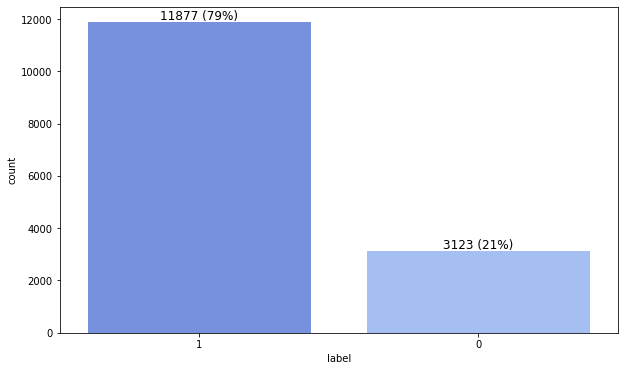

In [50]:
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(df["label"], 
                   order = df["label"].value_counts(ascending=False).index)

abs_values = df['label'].value_counts(ascending=False).values
rel_values = df['label'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls, size=12)


plt.show()

## 3.3 Data Modeling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
tweets = df['text'].values
y= df['label'].values

In [39]:
tweet_train, tweet_test, y_train, y_test = train_test_split(tweets, y, test_size=0.30, random_state=1000)

In [40]:
# Vectorize
vectorizer = CountVectorizer()
vectorizer.fit(tweet_train)

CountVectorizer()

In [41]:
X_train = vectorizer.transform(tweet_train)
X_test  = vectorizer.transform(tweet_test)
X_train

<10500x11834 sparse matrix of type '<class 'numpy.int64'>'
	with 124566 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 448  483]
 [  89 3480]]


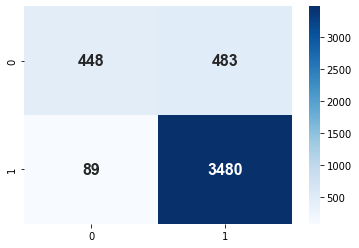

In [46]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f",
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'Arial'
            })
plt.show()

### Compute precision, recall, F-measure and support

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61       931
           1       0.88      0.98      0.92      3569

    accuracy                           0.87      4500
   macro avg       0.86      0.73      0.77      4500
weighted avg       0.87      0.87      0.86      4500



## ROC Curve

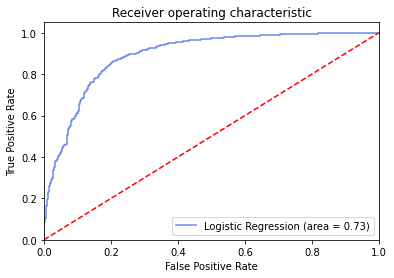

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).